## **1. Data Collection and Handling**

In [93]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [94]:
import pandas as pd

In [95]:
from google.colab import files

uploaded = files.upload()

Saving DATAs.csv to DATAs (1).csv


In [96]:
data= pd.read_csv('DATAs (1).csv')
data.head()

,Polymer,Substrate,Dosage [ppm],Adsorption [mg/m2],pH,MW,Tempearture [C],Ref
0,PAM,Silica,0.0010,0.086,6,17000,NAN,NaN
1,PAM,Silica,0.0030,0.213,6,17000,NAN,NaN
2,PAM,Silica,0.0270,0.239,6,17000,NAN,NaN
3,PAM,Silica,0.0051,0.260,6,17000,NAN,NaN
4,PAM,Silica,0.0082,0.256,6,17000,NAN,NaN


In [127]:
data=data.sort_values(by=['MW'])

In [128]:
data.head()

,Polymer,Substrate,Dosage [ppm],Adsorption [mg/m2],pH,MW,Tempearture [C],Ref
80,PAM,Silica,165.767,0.355,6,1500,15,The temperature effect on the adsorption mecha...
78,PAM,Silica,48.567,0.206,6,1500,15,The temperature effect on the adsorption mecha...
77,PAM,Silica,34.064,0.168,6,1500,15,The temperature effect on the adsorption mecha...
76,PAM,Silica,20.236,0.094,6,1500,15,The temperature effect on the adsorption mecha...
75,PAM,Silica,6.577,0.033,6,1500,15,The temperature effect on the adsorption mecha...


In [129]:
y=data['Dosage [ppm]']


In [130]:
x=data['Adsorption [mg/m2]']


In [131]:
z=data['MW']

In [132]:
s=data['MW'].unique()
s

array([     1500,     10000,     17000,    167000,    181000,    817000,
         1284000,   1600000,  17500000, 135000000])

In [160]:
k=[]
for j in range(len(s)):
    l=[]
    P=[]
   
    for i in range(len(y)):
        if z[i]==s[j]:
           l.append(y[i])
           P.append(x[i])
    S=sum(P)/sum(l)
    k.append(S)      





In [157]:
k

[0.0021968222013253338,
 0.0027359021442956988,
 6.295854458693707,
 7.5419580419580425,
 12.969696969696972,
 10.321705426356589,
 8.883268482490271]

In [161]:
s=data['MW'].unique()
s=s[0:len(s)-2]
s

array([   1500,   10000,   17000,  167000,  181000,  817000, 1284000,
       1600000])

In [151]:
import matplotlib.pyplot as plt

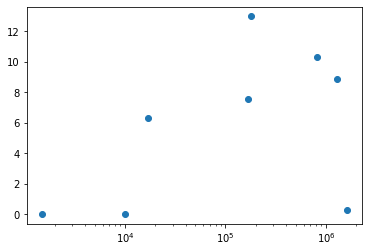

In [162]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(s,k)
ax.set_xscale('log') 

In [163]:
k = np.array(k)


In [164]:
s=s.reshape(-1, 1)

In [165]:
k=k.reshape(-1, 1)

In [166]:
s

array([[   1500],
       [  10000],
       [  17000],
       [ 167000],
       [ 181000],
       [ 817000],
       [1284000],
       [1600000]])

In [167]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [168]:
regressor = LinearRegression()
regressor.fit(s,k)


LinearRegression()

In [169]:
print(regressor.intercept_)
print(regressor.coef_)


[5.71624591]
[[1.35415002e-07]]


In [170]:
KK=regressor.coef_*s+regressor.intercept_

In [171]:
KK

array([[5.71644904],
       [5.71760006],
       [5.71854797],
       [5.73886022],
       [5.74075603],
       [5.82687997],
       [5.89011878],
       [5.93290992]])

The relationship between adsorption/dosage and MW is adsorption/dosage=-6.8e-8MW+9.23

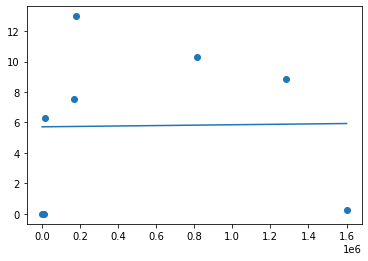

In [172]:
fig = plt.figure()
ax = plt.gca()
ax.plot(s,KK)
ax.scatter(s,k)

In [173]:
s

array([[   1500],
       [  10000],
       [  17000],
       [ 167000],
       [ 181000],
       [ 817000],
       [1284000],
       [1600000]])